In [ ]:
#Project Name: Womens_Clothing_E-Commerce_Reviews

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import nltk
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_ne_chunker')
#nltk.download('words')
from nltk.tokenize import word_tokenize
from nltk import pos_tag, ne_chunk
from collections import Counter
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
df_main = pd.read_csv(r'C:\Users\Public\Womens_Clothing_E-Commerce_Reviews.csv')

In [4]:
#Data set columns and records count:
print("Number of Columns :",len(df_main.columns))
print("Number of Records :",len(df_main))

Number of Columns : 21
Number of Records : 187888


In [6]:
#Displaying first five records:
df_main.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,...,Payment,version,type,offer,InvoiceNo,CustomerID,StockCode,Quantity,UnitPrice,Country
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,...,card,1,online,NaN,536365,17850.0,85123A,6,2.55,USA
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,...,cod,1,online,NaN,536365,17850.0,71053,6,3.39,USA
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,...,gift card,1,online,NaN,536365,17850.0,84406B,8,2.75,USA
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,...,card,1,online,NaN,536365,17850.0,84029G,6,3.39,USA
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,...,cod,1,online,NaN,536365,17850.0,84029E,6,3.39,USA


In [7]:
#To check the information about the DataFrame.
df_main.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187888 entries, 0 to 187887
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               187888 non-null  int64  
 1   Clothing ID              187888 non-null  int64  
 2   Age                      187888 non-null  int64  
 3   Title                    157408 non-null  object 
 4   Review Text              181128 non-null  object 
 5   Rating                   187888 non-null  int64  
 6   Recommended IND          187888 non-null  int64  
 7   Positive Feedback Count  187888 non-null  int64  
 8   Division Name            187776 non-null  object 
 9   Department Name          187776 non-null  object 
 10  Class Name               187776 non-null  object 
 11  Payment                  187888 non-null  object 
 12  version                  187888 non-null  int64  
 13  type                     187888 non-null  object 
 14  offe

In [9]:
#Data cleaning removing all duplicates and filling null values to zeros
df = df_main.drop_duplicates(keep=False)
df.columns.values[0] = "rowid"
df.count()

rowid                      187888
Clothing ID                187888
Age                        187888
Title                      157408
Review Text                181128
Rating                     187888
Recommended IND            187888
Positive Feedback Count    187888
Division Name              187776
Department Name            187776
Class Name                 187776
Payment                    187888
version                    187888
type                       187888
offer                           0
InvoiceNo                  187888
CustomerID                 132140
StockCode                  187888
Quantity                   187888
UnitPrice                  187888
Country                    187888
dtype: int64

In [10]:
df.describe()

,rowid,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,version,offer,CustomerID,Quantity,UnitPrice
count,187888.000000,187888.000000,187888.000000,187888.000000,187888.000000,187888.000000,187888.0,0.0,132140.000000,187888.000000,187888.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936,1.0,NaN,15267.930089,9.206506,5.046833
std,6779.842247,203.295193,12.279315,1.110010,0.382209,5.702095,0.0,NaN,1725.787839,248.008812,97.173450
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000,1.0,NaN,12346.000000,-74215.000000,0.000000
25%,5871.000000,861.000000,34.000000,4.000000,1.000000,0.000000,1.0,NaN,13819.000000,1.000000,1.250000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000,1.0,NaN,15135.000000,3.000000,2.110000
75%,17614.000000,1078.000000,52.000000,5.000000,1.000000,3.000000,1.0,NaN,16791.000000,10.000000,4.210000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000,1.0,NaN,18283.000000,74215.000000,16888.020000


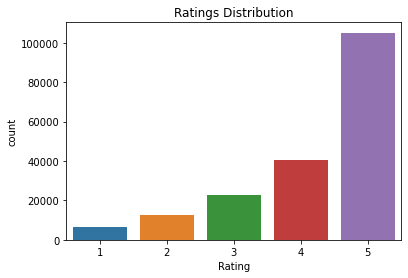

In [7]:
# A bar plot of the ratings distribution
sns.countplot(x='Rating', data=df)
plt.title('Ratings Distribution')
plt.show()

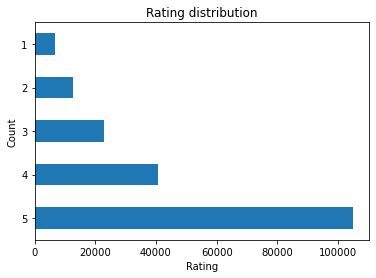

In [9]:
# A bar Chart of the ratings distribution
rating_counts = df['Rating'].value_counts()
rating_counts.plot(kind='barh')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating distribution')
plt.show()

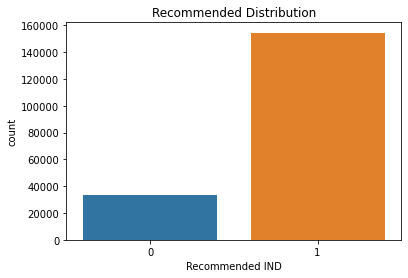

In [10]:
# A histogram of the recommended distribution
sns.countplot(x='Recommended IND', data=df)
plt.title('Recommended Distribution')
plt.show()

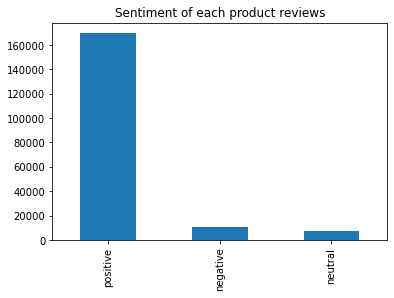

In [11]:
# sentiment analysis on product reviews 
def sentiment_chk_fun(review):
    blob = TextBlob(str(review))
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['Review Text'].apply(sentiment_chk_fun)
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar')
plt.title('Sentiment of each product reviews')
plt.show()

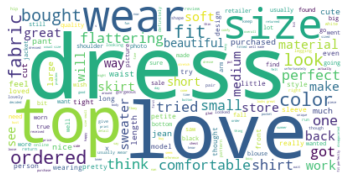

In [12]:
# Logic for word cloud
reviews = ' '.join(df['Review Text'].astype(str))
wordcloud = WordCloud(background_color='white').generate(reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
# TF-IDF for the reviews
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['Review Text'].values.astype('U'))
print("TF-IDF for the reviews :", tfidf_matrix.shape)

TF-IDF for the reviews : (187888, 13856)


In [14]:
# Topic modelling on the reviews
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(tfidf_matrix)

for topic_idx, topic in enumerate(lda.components_):
    print(f'Topic {topic_idx+1}: {" ".join([vectorizer.get_feature_names()[i] for i in topic.argsort()[:-11:-1]])}')

Topic 1: dress like size fit love small just look shirt fabric
Topic 2: love great jeans sweater like pants fit wear size nice
Topic 3: love great dress comfortable color wear soft fits perfect size
Topic 4: great love perfect color fall wear fit dress size summer
Topic 5: size small large ordered fit dress medium runs big wear
Topic 6: nan dress like size wear love fits fit lars felt
Topic 7: dress like look fabric just fit really didn looked love
Topic 8: dress size fit like fabric small just love ordered wear
Topic 9: dress love skirt wear great compliments like comfortable flattering fit
Topic 10: dress love fit perfect wear size flattering great like bought


In [15]:
# logic for Text Classification:
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(df['Review Text'].astype(str), df['Rating'], test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

clf = LinearSVC(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      0.90      0.94      1303
           2       0.92      0.85      0.89      2467
           3       0.88      0.83      0.86      4570
           4       0.85      0.71      0.77      8187
           5       0.89      0.97      0.92     21051

    accuracy                           0.88     37578
   macro avg       0.90      0.85      0.87     37578
weighted avg       0.88      0.88      0.88     37578



In [16]:
# The length of each review
df['Review Length'] = df['Review Text'].str.len()
print(f'Average review text length: {df["Review Length"].mean():.2f} characters')

Average review text length: 308.69 characters
